# Partie 1 : Explorer les données et comparer deux quartiers 

## 1. Importer les bibliothèques nécessaires 

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1. Charger le fichier AmesHousing.csv
df = pd.read_csv("AmesHousing.csv")

# Vérifier la structure
print(df.shape)
print(df.columns)

(2930, 82)
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr B

In [238]:
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [239]:
df[["Neighborhood", "SalePrice", "1st Flr SF"]].head(10)

,Neighborhood,SalePrice,1st Flr SF
0,NAmes,215000,1656
1,NAmes,105000,896
2,NAmes,172000,1329
3,NAmes,244000,2110
4,Gilbert,189900,928
5,Gilbert,195500,926
6,StoneBr,213500,1338
7,StoneBr,191500,1280
8,StoneBr,236500,1616
9,Gilbert,189000,1028


## 2. Explorer les valeurs catégoriques 

### 2. Quartiers présents + fréquences

In [242]:
# Quartiers disponibles
print(df["Neighborhood"].unique())

# Fréquences de chaque quartier
neigh_counts = df["Neighborhood"].value_counts()
print(neigh_counts)

['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64


## 3. Sélectionner les deux quartiers les plus représentés 

In [244]:
# Identifier que les quartiers les plus fréquents. 
# Les deux plus fréquents sont "NAmes" et "CollgCr".

In [245]:
# Restreindre aux deux quartiers
# Garder seulement NAmes et CollgCr
mask_two = df["Neighborhood"].isin(["NAmes", "CollgCr"])
df_two = df[mask_two].copy()

df_two["Neighborhood"].value_counts()


Neighborhood
NAmes      443
CollgCr    267
Name: count, dtype: int64

## 4. Analyser les statistiques descriptives 

In [247]:
# Grouper les données par quartier (groupby) +  Statistiques descriptives du prix par quartier
stats_price = df_two.groupby("Neighborhood")["SalePrice"].describe()
stats_price

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
CollgCr,267.0,201803.434457,54187.843749,110000.0,160875.0,200000.0,228250.0,475000.0
NAmes,443.0,145097.349887,31882.707229,68000.0,127000.0,140000.0,157500.0,345000.0


## 5. Visualiser et interpréter les résultats 

In [249]:
# CollgCr :

# 267 ventes,

# prix moyen = 201 803 $, médiane ≈ 200 000 $.

# NAmes (NAmes) :

# 443 ventes,

# prix moyen = 145 100 $, médiane = 140 000 $.
# à première vue, CollgCr semble plus cher que NAmes, en moyenne et en médiane.

## 6. Amélioration de la lisibilité 

In [251]:
# Transposition pour meilleure lisibilité 
stats_price = stats_price.T
print("\nStatistiques descriptives transposées :")
print(stats_price)


Statistiques descriptives transposées :
Neighborhood        CollgCr          NAmes
count            267.000000     443.000000
mean          201803.434457  145097.349887
std            54187.843749   31882.707229
min           110000.000000   68000.000000
25%           160875.000000  127000.000000
50%           200000.000000  140000.000000
75%           228250.000000  157500.000000
max           475000.000000  345000.000000


# Partie 2 : Visualiser les distributions des prix de vente 

## 1. Préparation des données 

In [330]:
# Extraction des prix de ventes par quartier dans deux séries pandas
north_ames_price = df_two.loc[df_two["Neighborhood"] == "NAmes", "SalePrice"].dropna()
college_cr_price = df_two.loc[df_two["Neighborhood"] == "CollgCr", "SalePrice"].dropna()

print("Taille NAmes :", north_ames_price.shape)
print("Taille CollgCr :", college_cr_price.shape)
north_ames_price

Taille NAmes : (443,)
Taille CollgCr : (267,)


0       215000
1       105000
2       172000
3       244000
23      149000
         ...  
2630    155000
2631    134500
2632    120000
2633    105000
2634    124000
Name: SalePrice, Length: 443, dtype: int64

## 2. Visualisation des distributions: Histogrammes 

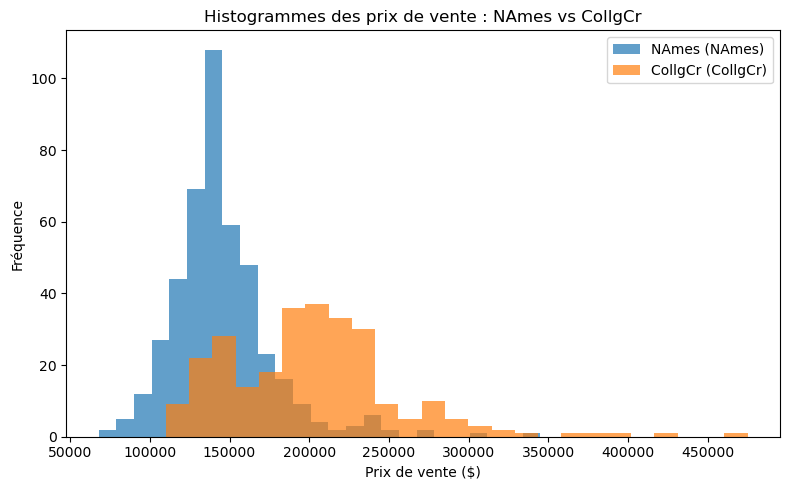

In [256]:
plt.figure(figsize=(8, 5))

plt.hist(north_ames_price,
         bins=25,
         alpha=0.7,
         label="NAmes (NAmes)")

plt.hist(college_cr_price,
         bins=25,
         alpha=0.7,
         label="CollgCr (CollgCr)")

plt.xlabel("Prix de vente ($)")
plt.ylabel("Fréquence")
plt.title("Histogrammes des prix de vente : NAmes vs CollgCr")
plt.legend()
plt.tight_layout()
plt.show()

In [257]:
# Les barres de CollgCr sont davantage concentrees vers des prix plus éleves.

# Il y a un recouvrement, mais la distribution de CollgCr semble clairement decalee vers la droite donc maisons plus cheres.

## 3. Visualisation des distributions : Fonction de distribution cumulative (CDF) 

### 3.1 Option DataFrame + colonne CDF 

In [260]:
# Conversion en DataFrame
north_df = north_ames_price.to_frame(name="SalePrice").sort_values("SalePrice")
college_df = college_cr_price.to_frame(name="SalePrice").sort_values("SalePrice")

# Ajout de la colonne CDF (rang relatif en pourcentage)
north_df["CDF"] = north_df["SalePrice"].rank(method="first", pct=True)
college_df["CDF"] = college_df["SalePrice"].rank(method="first", pct=True)

north_df.head(), college_df.head()


(      SalePrice       CDF
 2598      68000  0.002257
 397       76500  0.004515
 2624      81400  0.006772
 125       84900  0.009029
 2625      87500  0.011287,
       SalePrice       CDF
 1450     110000  0.003745
 2140     112500  0.007491
 2143     117000  0.011236
 2787     119900  0.014981
 2139     120000  0.018727)

### 3.2 Fonction réutilisable plot_CDF()

In [262]:
def plot_CDF(series, ax=None, label=None):
    """
    Trace une CDF pour une série pandas.
    - series : série de valeurs numériques
    - ax : axe matplotlib existant (optionnel)
    - label : étiquette pour la légende
    """
    data = series.dropna().sort_values()
    cdf = data.rank(method="first", pct=True)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))

    ax.plot(data, cdf, marker=".", linestyle="-", label=label)
    ax.set_xlabel("Prix de vente ($)")
    ax.set_ylabel("CDF (proportion ≤ x)")
    ax.grid(True)
    return ax


### 3.3 Tracer les deux CDF sur le même graphique

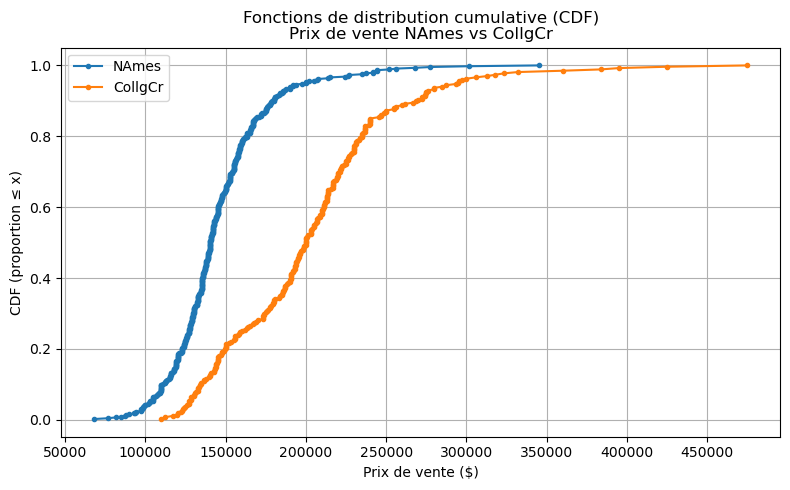

In [264]:
fig, ax = plt.subplots(figsize=(8, 5))

ax = plot_CDF(north_ames_price, ax=ax, label="NAmes")
ax = plot_CDF(college_cr_price, ax=ax, label="CollgCr")

ax.set_title("Fonctions de distribution cumulative (CDF)\nPrix de vente NAmes vs CollgCr")
ax.legend()
plt.tight_layout()
plt.show()

In [265]:
# Pour une même proportion de maisons (par exemple 50 %), la courbe de CollgCr atteint des prix plus élevés que celle de NAmes.

# Les CDF ne se superposent pas → les distributions des prix dans les deux quartiers ne sont pas identiques.

# Partie 3 : Exécuter un test statistique pour comparer deux distributions 

## 1. Importer la bibliothèque statistique 

In [268]:
from scipy import stats

## 2. Découvrir les outils disponibles

In [270]:
# Affiche l’aide générale de scipy.stats (optionnel mais demandé)
# help(stats)

# On identifie la fonction qui nous intéresse :
# stats.ks_2samp?


## 3. Exécuter le test KS 

In [272]:
# Test KS à deux échantillons
ks_result = stats.ks_2samp(north_ames_price, college_cr_price)

print("Statistique KS :", ks_result.statistic)
print("p-value        :", ks_result.pvalue)

Statistique KS : 0.5836609430085982
p-value        : 3.2892428354379855e-53


## 4. Interpréter la valeur p 

In [274]:
alpha = 0.05

if ks_result.pvalue <= alpha:
    print(f"p-value = {ks_result.pvalue:.3e} ≤ {alpha} → on rejette H0.")
    print("Conclusion : les distributions de prix de vente de NAmes et CollgCr sont différentes.")
else:
    print(f"p-value = {ks_result.pvalue:.3e} > {alpha} → on ne rejette pas H0.")
    print("Conclusion : on ne détecte pas de différence significative entre les distributions.")


p-value = 3.289e-53 ≤ 0.05 → on rejette H0.
Conclusion : les distributions de prix de vente de NAmes et CollgCr sont différentes.


In [275]:
# La p-value obtenue est très inférieure à 0,05.
# Nous rejetons donc H₀ : les prix de vente de NAmes et CollgCr ne proviennent pas de la meme distribution.
# Cela confirme ce que nous avions observé avec les histogrammes et les CDF.

# Partie 4 : Tester la normalité des distributions 

## 1. Appliquer le test Shapiro–Wilk

In [278]:
# Test Shapiro–Wilk pour NAmes
stat_na, p_na = stats.shapiro(north_ames_price)
print("NAmes (NAmes) - Shapiro–Wilk")
print("Statistique :", stat_na, " | p-value :", p_na)

# Test Shapiro–Wilk pour CollgCr
stat_cc, p_cc = stats.shapiro(college_cr_price)
print("\nCollgCr (CollgCr) - Shapiro–Wilk")
print("Statistique :", stat_cc, " | p-value :", p_cc)

alpha = 0.05
print("\nInterprétation numérique :")
if p_na <= alpha:
    print(f"NAmes : p-value = {p_na:.3e} ≤ {alpha} → distribution NON normale.")
else:
    print(f"NAmes : p-value = {p_na:.3e} > {alpha} → on ne rejette pas la normalité.")

if p_cc <= alpha:
    print(f"CollgCr : p-value = {p_cc:.3e} ≤ {alpha} → distribution NON normale.")
else:
    print(f"CollgCr : p-value = {p_cc:.3e} > {alpha} → on ne rejette pas la normalité.")


NAmes (NAmes) - Shapiro–Wilk
Statistique : 0.8932009892779424  | p-value : 5.124904026764063e-17

CollgCr (CollgCr) - Shapiro–Wilk
Statistique : 0.9278154635655026  | p-value : 4.162976796933535e-10

Interprétation numérique :
NAmes : p-value = 5.125e-17 ≤ 0.05 → distribution NON normale.
CollgCr : p-value = 4.163e-10 ≤ 0.05 → distribution NON normale.


## 2. Visualiser la normalité – Diagramme de probabilité

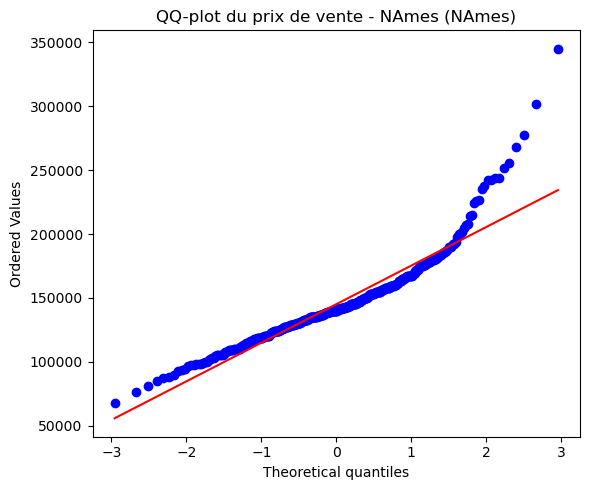

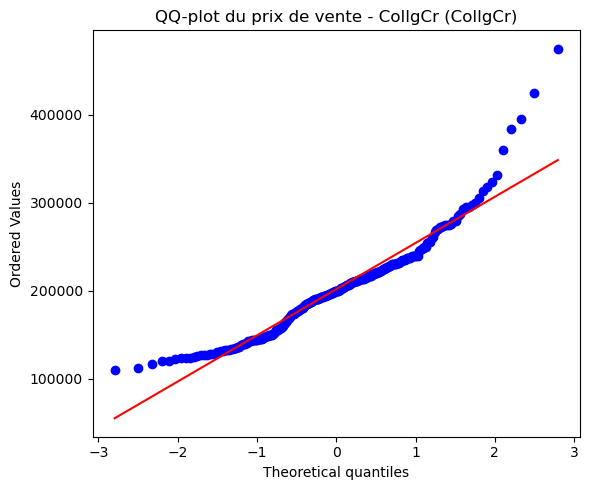

In [280]:
# QQ-plot pour NAmes
plt.figure(figsize=(6, 5))
stats.probplot(north_ames_price, dist="norm", plot=plt)
plt.title("QQ-plot du prix de vente - NAmes (NAmes)")
plt.tight_layout()
plt.show()

# QQ-plot pour CollgCr
plt.figure(figsize=(6, 5))
stats.probplot(college_cr_price, dist="norm", plot=plt)
plt.title("QQ-plot du prix de vente - CollgCr (CollgCr)")
plt.tight_layout()
plt.show()


In [281]:
# # Ici, les points s’écartent surtout dans la queue droite donc présence de maisons très chères, distribution asymétrique par consequents non normale.
# Pour les deux quartiers, les QQ-plots montrent que les prix de vente présentent une forte asymétrie à droite et s’écartent d’une loi normale,
# surtout pour les valeurs élevées.

# Cela confirme les résultats du test de Shapiro–Wilk et justifie l’utilisation de tests non paramétriques
# (comme le test de Kolmogorov–Smirnov) dans le reste de l’analyse.


## 3. Compléter avec un histogramme pour chaque quartier

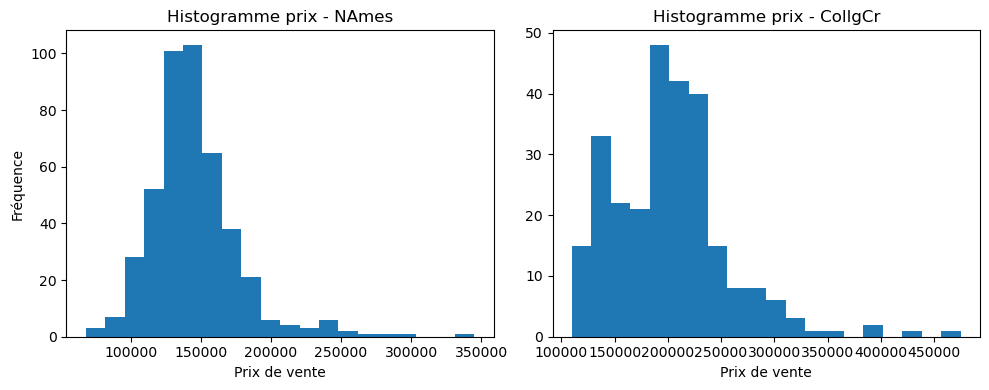

In [283]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(north_ames_price, bins=20)
plt.title("Histogramme prix - NAmes")
plt.xlabel("Prix de vente")
plt.ylabel("Fréquence")

plt.subplot(1, 2, 2)
plt.hist(college_cr_price, bins=20)
plt.title("Histogramme prix - CollgCr")
plt.xlabel("Prix de vente")

plt.tight_layout()
plt.show()


In [284]:
# Les données de NAmes présentent une queue à droite (distribution non 
# normale). 
# Les données de CollgCr montrent également une asymétrie et ne suivent pas 
# une courbe en cloche. 
# Les deux distributions ne sont pas normales, ce qui justifie l’usage de tests non 
# paramétriques dans les prochaines analyses. 

# Partie 5 : Vérification de la répartition en pieds carrés 

## 1. Extraction des données (NAmes et CollgCr + 1st Flr SF)

In [287]:
# Sous-ensemble pour chaque quartier
df_na = df[df["Neighborhood"] == "NAmes"]
df_cc = df[df["Neighborhood"] == "CollgCr"]

# Extraction de la colonne de surface du 1er étage pour les maisons de chaque cartier
na_sf = df_na["1st Flr SF"].dropna()
cc_sf = df_cc["1st Flr SF"].dropna()

print("Taille NAmes SF :", na_sf.shape)
print("Taille CollgCr SF :", cc_sf.shape)
na_sf

Taille NAmes SF : (443,)
Taille CollgCr SF : (267,)


0       1656
1        896
2       1329
3       2110
23      1004
        ... 
2630     660
2631     999
2632    1045
2633     864
2634    1025
Name: 1st Flr SF, Length: 443, dtype: int64

## 2. Visualisation des distributions 

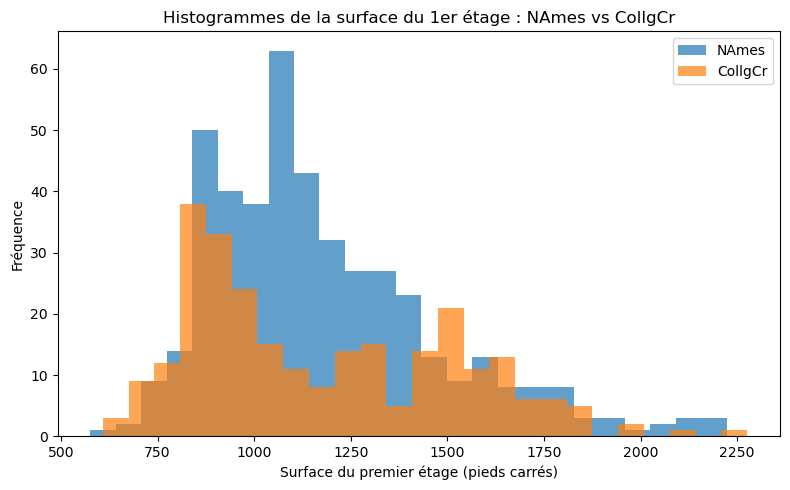

In [289]:
plt.figure(figsize=(8, 5))

plt.hist(na_sf, bins=25, alpha=0.7, label="NAmes")
plt.hist(cc_sf, bins=25, alpha=0.7, label="CollgCr")

plt.xlabel("Surface du premier étage (pieds carrés)")
plt.ylabel("Fréquence")
plt.title("Histogrammes de la surface du 1er étage : NAmes vs CollgCr")
plt.legend()
plt.tight_layout()
plt.show()

In [290]:
# Les deux histogrammes se recouvrent en partie, mais CollgCr présente une distribution plus large et plus décalée vers les grandes surfaces, 
# alors que NAmes est plus concentré autour de surfaces moyennes. 
# Cela suggère que, même si la surface moyenne peut sembler proche, la répartition complète des surfaces est différente entre les deux quartiers, 
# avec plus de grandes maisons à CollgCr.

## 3. Test statistique : Kolmogorov-Smirnov (KS test) 

In [292]:
ks_sf = stats.ks_2samp(na_sf, cc_sf)

print("Test KS pour 1st Flr SF")
print("Statistique KS :", ks_sf.statistic)
print("p-value        :", ks_sf.pvalue)

alpha = 0.05
if ks_sf.pvalue <= alpha:
    print(f"p-value = {ks_sf.pvalue:.3e} ≤ {alpha} → on rejette H0.")
    print("Conclusion : les distributions de surface du 1er étage de NAmes et CollgCr sont différentes.")
else:
    print(f"p-value = {ks_sf.pvalue:.3e} > {alpha} → on ne rejette pas H0.")
    print("Conclusion : pas de différence significative détectée entre les distributions de surface.")


Test KS pour 1st Flr SF
Statistique KS : 0.15300851362433526
p-value        : 0.0007057410997705426
p-value = 7.057e-04 ≤ 0.05 → on rejette H0.
Conclusion : les distributions de surface du 1er étage de NAmes et CollgCr sont différentes.


In [293]:
# Les maisons de CollgCr et NAmes ne partagent pas la même distribution de 
# surface, ce qui peut refléter des différences structurelles, de standing ou de conception 
# dans ces deux zones résidentielles. 

### Analyse exploratoire complémentaire (Créativité)

Dans cette section, nous ajoutons un nuage de points, pour mieux comprendre les différences entre NAmes et CollgCr à travers la surface du premier étage.


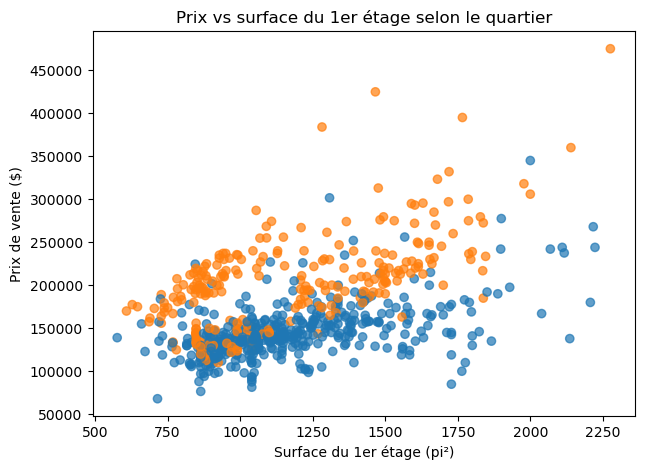

In [295]:
# Scatter plot Prix vs Surface, coloré par quartier
plt.figure(figsize=(7,5))
plt.scatter(df_two["1st Flr SF"], df_two["SalePrice"],
            c=df_two["Neighborhood"].map({"NAmes": "tab:blue", "CollgCr": "tab:orange"}),
            alpha=0.7)
plt.xlabel("Surface du 1er étage (pi²)")
plt.ylabel("Prix de vente ($)")
plt.title("Prix vs surface du 1er étage selon le quartier")
plt.show()


Le nuage de points met en évidence une relation positive entre la surface du premier étage et le prix de vente : plus la maison est grande, plus le prix tend à augmenter, quel que soit le quartier.
On observe aussi que, pour une même surface, les points orange (CollgCr) sont généralement situés au-dessus des points bleus (NAmes). Cela signifie qu’à superficie comparable, les maisons de CollgCr se vendent plus cher que celles de NAmes.
Enfin, CollgCr présente davantage de maisons de très grande surface, alors que NAmes reste concentré sur des surfaces plus modestes. Ces observations confirment les différences de standing et de prix déjà mises en évidence par les analyses précédentes.